## Explore `sdf` output
`sdf` generates a large amount of information during fitting. Most of this is saved in a database that isn't visible on the web, and also in `pickle` files that can be found for each model under the "..." link.

A simpler output is the `json` files under the "model" link, there is less detail here, but they are sufficient for plotting.

To just explore the output you can probably avoid installing the `sdf` package.

In [20]:
import requests
import pickle
import matplotlib.pyplot as plt

%matplotlib inline

In [21]:
sdbid = 'sdb-v2-105628.83+070052.3'

### json output
To explore json output we don't need any special packages. Either download directly with `requests`, or open with the `json` module.

In [22]:
url = f'http://drgmk.com/sdb/seds/masters/{sdbid}/public/{sdbid}-mnest/phoenix_sol+modbb_disk_r_.json'
r = requests.get(url)

In [23]:
d = r.json()

In [24]:
for k in d.keys():
    print(k, type(d[k]))

id <class 'str'>
write_time <class 'float'>
model_comps <class 'list'>
main_results <class 'list'>
parameters <class 'list'>
best_params <class 'list'>
best_params_1sig <class 'list'>
chisq <class 'float'>
phot_band <class 'list'>
phot_wavelength <class 'list'>
phot_fnujy <class 'list'>
phot_e_fnujy <class 'list'>
phot_upperlim <class 'list'>
phot_ignore <class 'list'>
model_comp_fnujy <class 'list'>
model_comp_fnujy_1sig <class 'list'>
model_total_fnujy <class 'list'>
model_total_fnujy_1sig <class 'list'>
spectra <class 'list'>
model_spectra <class 'list'>
star_spec <class 'dict'>
disk_spec <class 'dict'>


The information contained in the json is largely related to the observational data, e.g. photometry and models in the observed bands.

There are also spectra for each model component.

### pickle output
To explore the pickle data we need the `pickle` package. There is a tonne of information saved here, including fluxes for the models in all bands known to `sdf`, and the distributions from which those fluxes were derived.

In [25]:
s = requests.get(f'http://drgmk.com/sdb/seds/masters/{sdbid}/public/{sdbid}-mnest/phoenix_sol+modbb_disk_r_.pkl')

In [26]:
r = pickle.loads(s.content)

In [27]:
# print the model component fluxes for the NIRCAM bands
print(f'filter: {r.model_comps}, total')
for i,f in enumerate(r.all_filters):
    if 'NIRCAM' in f:
        print(f, r.all_comp_phot[:,i], r.all_phot[i])

filter: ('phoenix_sol', 'modbb_disk_r'), total
NIRCAM.F150W [2.17950193e+000 1.80365831e-113] 2.1795019322267675
NIRCAM.F405N [1.29516383e+000 3.04228450e-106] 1.2951638326082477
NIRCAM.F323N [1.27168280e+000 1.46203273e-109] 1.271682804333115
NIRCAM.F210M [2.05226982e+000 9.55447210e-113] 2.0522698168597815
NIRCAM.F150W2 [2.12812595e+000 5.40921229e-113] 2.1281259533213177
NIRCAM.F212N [2.11271493e+000 2.12398329e-113] 2.1127149276867714
NIRCAM.F444W [1.04482296e+000 1.90151994e-107] 1.0448229640852085
NIRCAM.F322W2 [1.35090672e+000 1.44534698e-108] 1.350906715828009
NIRCAM.F356W [1.36228557e+000 1.06865901e-108] 1.3622856679608495
NIRCAM.F410M [1.26798402e+000 1.72214377e-106] 1.2679843045838326
NIRCAM.F187N [1.83759521e+000 2.05298226e-113] 1.8375952118969834
NIRCAM.F430M [1.09345149e+000 1.44172143e-108] 1.0934514942271554
NIRCAM.F277W [1.34249220e+000 3.67432172e-108] 1.342492196021113
NIRCAM.F090W [8.39770525e-001 2.59055666e-113] 0.8397705250558736
NIRCAM.F070W [1.09555898e-001 

In [28]:
# look at the flux distribution for a specific filter
filter = 'NIRCAM.F250MC'

for i,f in enumerate(r.all_filters):
    if filter in f:
        print(f, r.all_comp_phot[:,i], r.all_phot[i])
        dist = r.distributions['all_phot'][i]

NIRCAM.F250MC [1.50235242e+00 3.53954745e-29] 1.5023524231424878


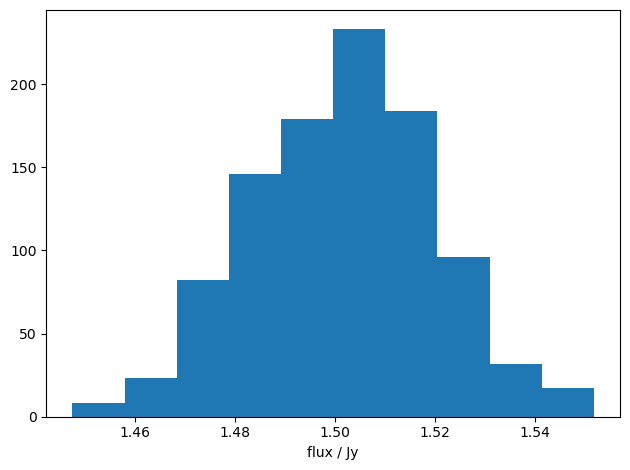

In [29]:
fig, ax = plt.subplots()
ax.hist(dist)
ax.set_xlabel('flux / Jy')
fig.tight_layout()

In [30]:
# get the fluxes as magnitudes
# for this we need sdf which has zero points derived from the CALSPEC Vega spectrum
import sdf.filter
import numpy as np

f = sdf.filter.Filter.get(filter)
print(f'zero point for {filter}: {f.zero_point:.2f} Jy')
print(f'{np.median(f.flux2mag(dist)):.3f} +/- {np.std(f.flux2mag(dist)):.3f} mag (Vega STIS)')

zero point for NIRCAM.F250MC: 513.84 Jy
6.335 +/- 0.013 mag (Vega STIS)
